In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
import numpy as np
import math as math
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Imports 

In [2]:
df = pd.read_csv("wine.data", header=None)

Reads the wine.data file and creates a Pandas DataFrame without column headers since there is none in the file.

In [3]:
column_names =["Class Labels","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline" ]
df.columns = column_names
df

Class Labels  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0               1    14.23        1.71  2.43               15.6        127   
1               1    13.20        1.78  2.14               11.2        100   
2               1    13.16        2.36  2.67               18.6        101   
3               1    14.37        1.95  2.50               16.8        113   
4               1    13.24        2.59  2.87               21.0        118   
..            ...      ...         ...   ...                ...        ...   
173             3    13.71        5.65  2.45               20.5         95   
174             3    13.40        3.91  2.48               23.0        102   
175             3    13.27        4.28  2.26               20.0        120   
176             3    13.17        2.59  2.37               20.0        120   
177             3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

Names the column headers appropriately.

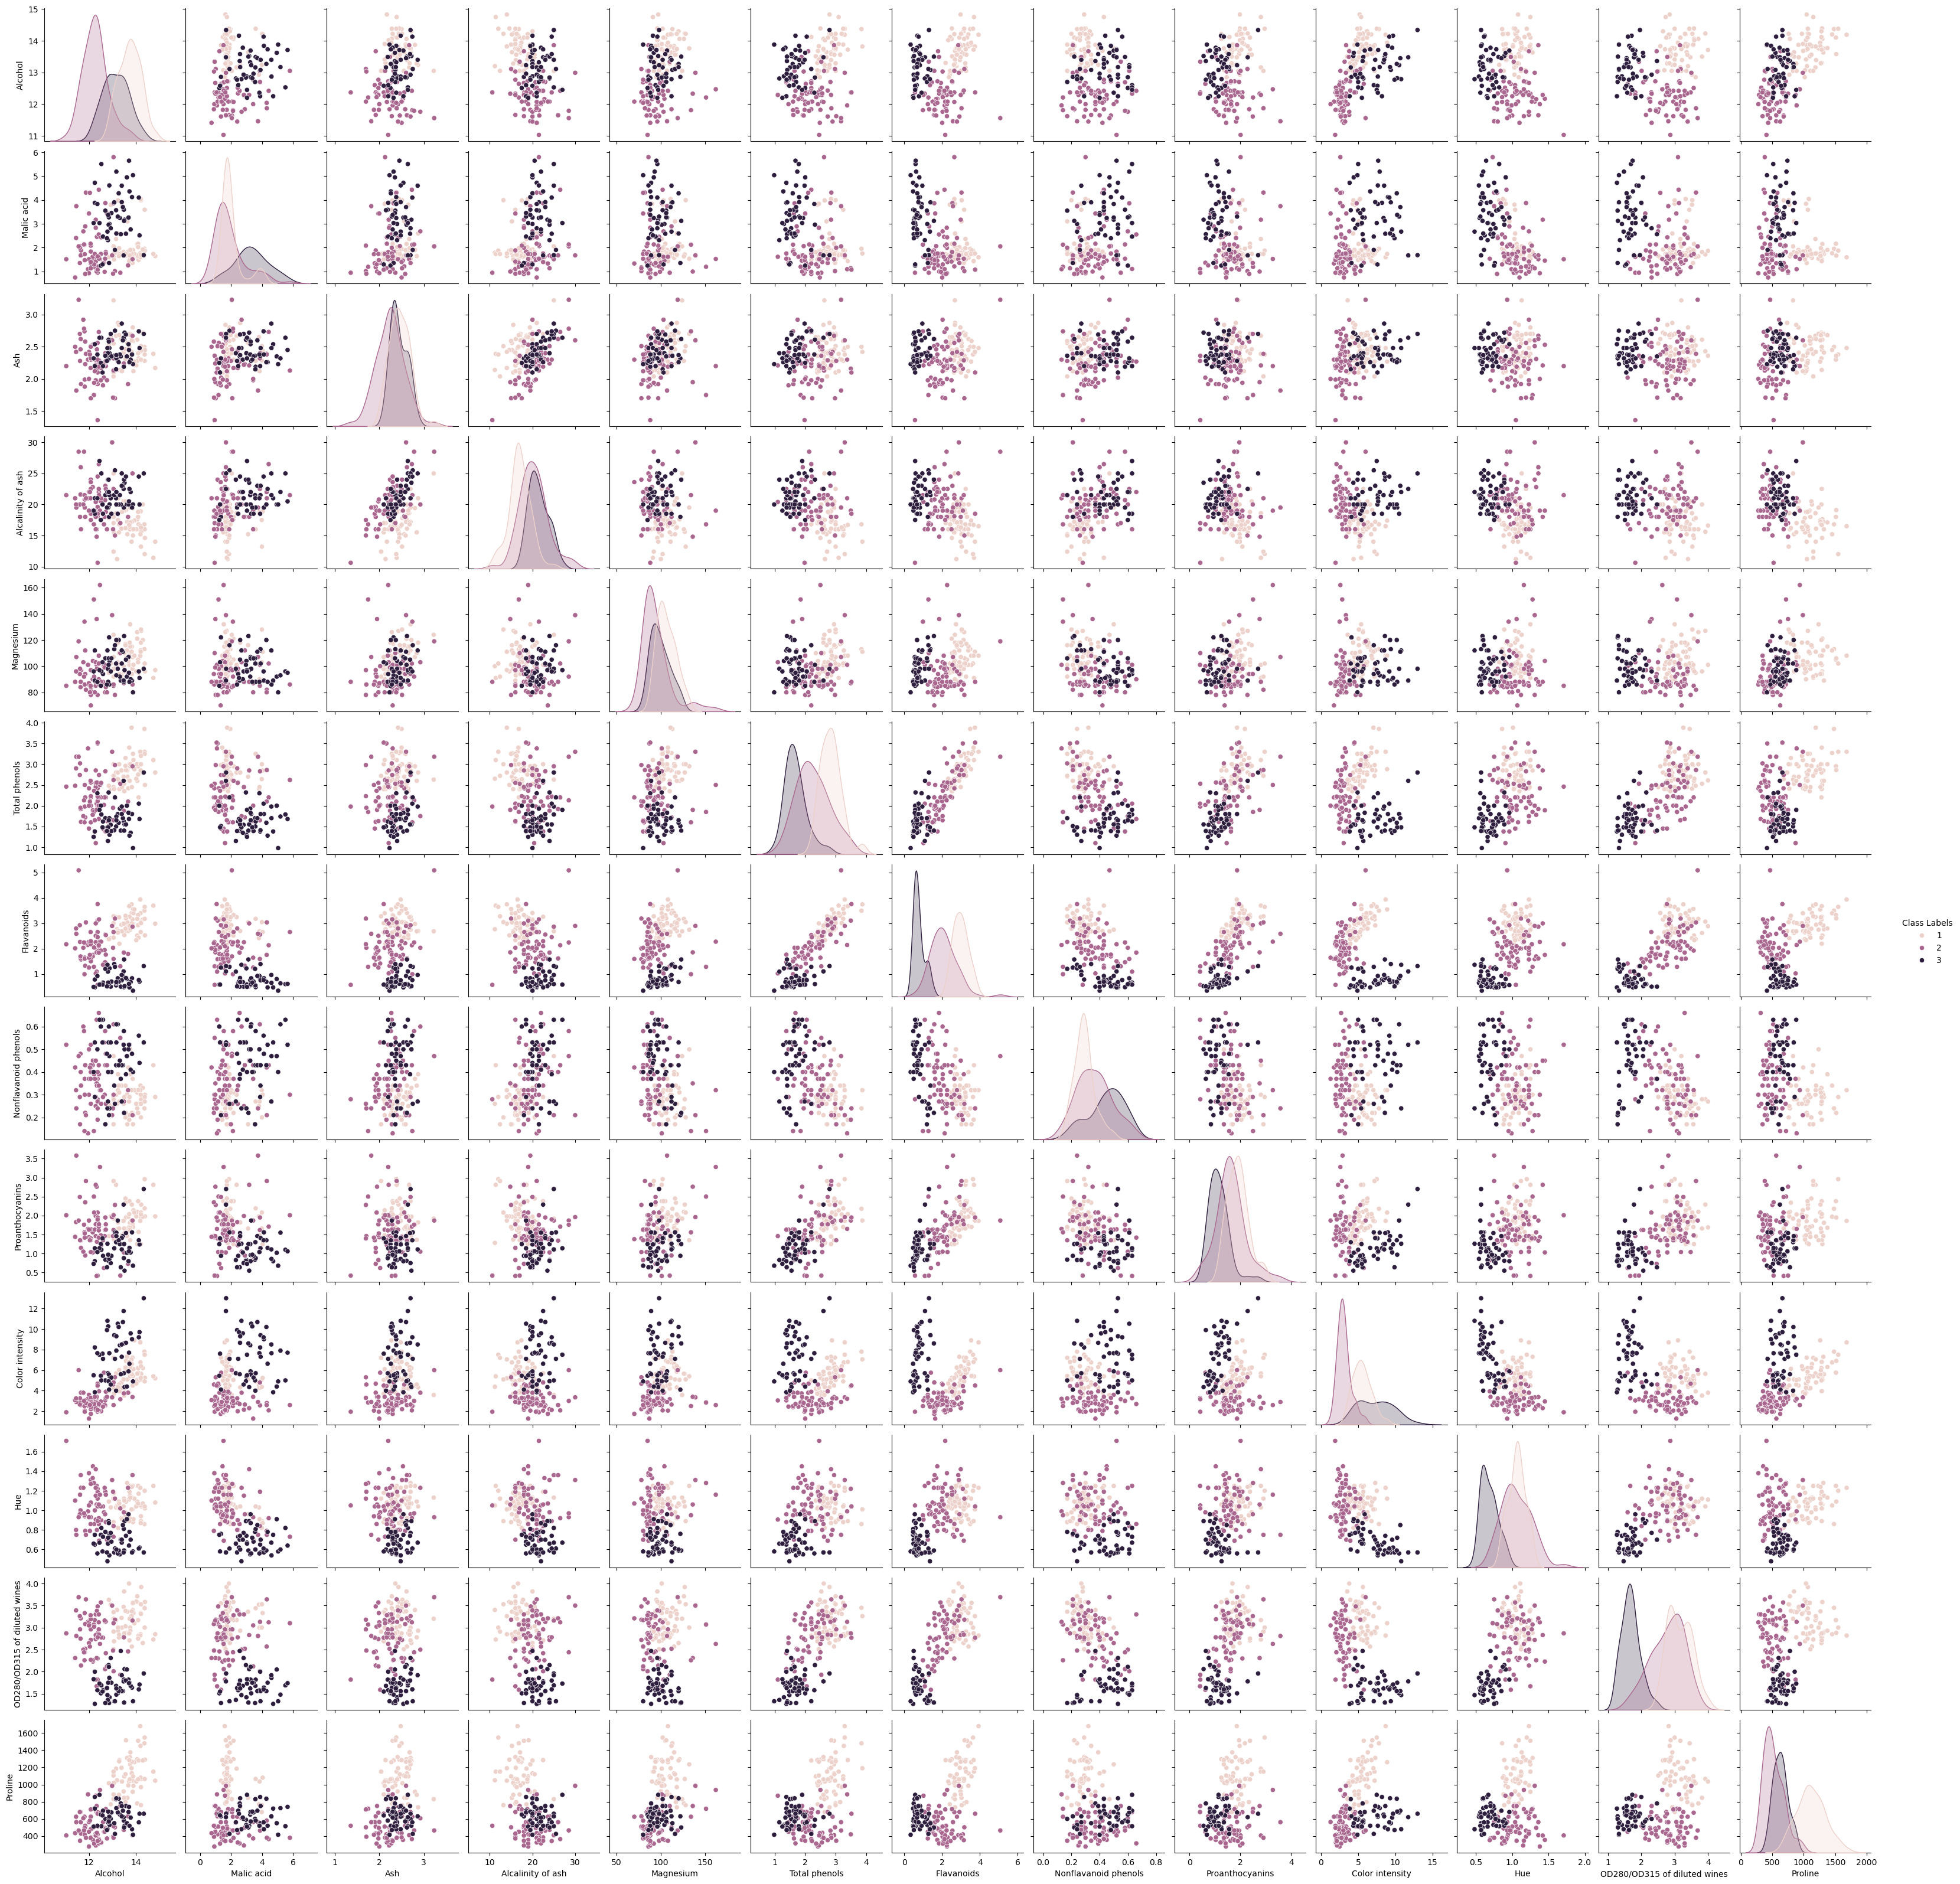

In [4]:
sns.pairplot(df, hue="Class Labels")

Plots every combination of "Feature x Feature" graph for visualization of the data. It is already apparent that this data is very suitable for kNN since the data is grouped together in terms of their class labels generally well.

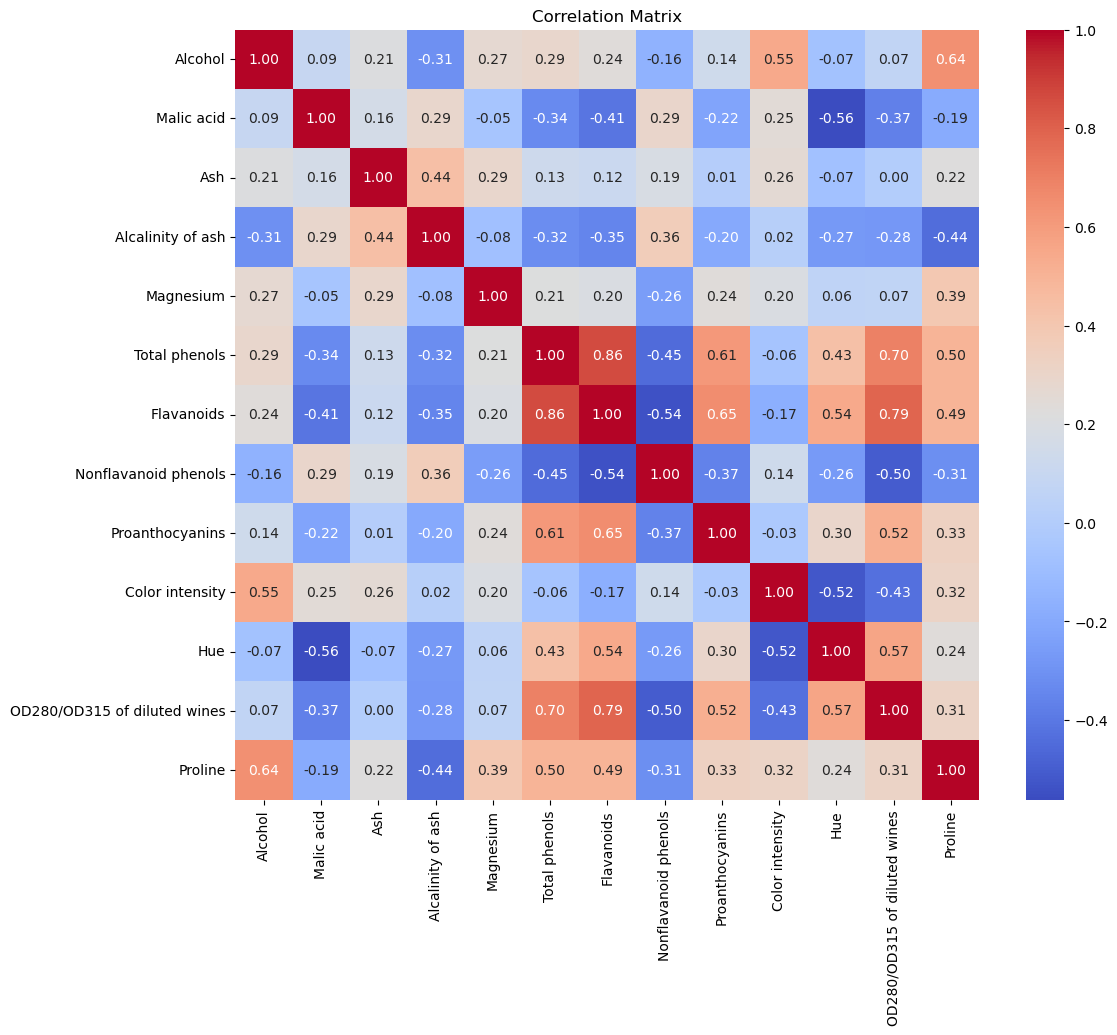

In [5]:
corr_matrix = df.drop(columns=["Class Labels"]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Plots a correlation matrix. Despite the existance of few highly correlated features, I have decided not to eliminite any of them since there are not many features in the first place.

In [6]:
df.isnull().sum()
dfm = df.dropna()

First step of preprocessing. Checks missing values and removes the rows with missing values, if there is any. There is none in wine.data file provided.

In [7]:
x = dfm.iloc[:, 1:].values
y = dfm.iloc[:, 0].values

Splits feature columns (x) and the class column (y).

In [8]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)

As a normalization method, standard scaler is used.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=3)

Shuffles and then splits the data into training (80%) and testing (20%) sets.

In [10]:
def kNN(x_test,x_train,y_train,distance_metric,k):
    result = [0]*len(x_test)
    if distance_metric == "Euclidean":
        for i2 in range(len(x_test)):
            sum = [0]*len(x_train)
            distance = [0]*len(x_train)
            for i1 in range(len(x_train)):
                for j in range(len(x_train.T)):
                    sum[i1] = sum[i1] + (x_train[i1,j] - x_test[i2,j])**2
                distance[i1] = math.sqrt(sum[i1])
            minclasses = []
            for w in range(k):
                min = np.argmin(distance)
                minclasses.append(y_train[min])
                distance[min] = np.inf
            count = Counter(minclasses)
            minclass = count.most_common(1)[0][0]       
            result[i2] = minclass
    elif distance_metric == "Manhattan":
        for i2 in range(len(x_test)):
            sum = [0]*len(x_train)
            distance = [0]*len(x_train)
            for i1 in range(len(x_train)):
                for j in range(len(x_train.T)):
                    sum[i1] = sum[i1] + abs(x_train[i1,j] - x_test[i2,j])
                distance[i1] = sum[i1]
                minclasses = []
            for w in range(k):
                min = np.argmin(distance)
                minclasses.append(y_train[min])
                distance[min] = np.inf
            count = Counter(minclasses)
            minclass = count.most_common(1)[0][0]       
            result[i2] = minclass
    else:
        raise Exception("Choose a proper distance metric! Type Euclidean or Manhattan in quotation marks as your 4th variable of kNN function.")
    return result

Definition of kNN algorithm itself. It has 5 variables: x_test(The actual feature data to be used), x_train(Features for training), y_train(Corresponding class labels of the train data), distance_metric(Euclidean or Manhattan), and k.

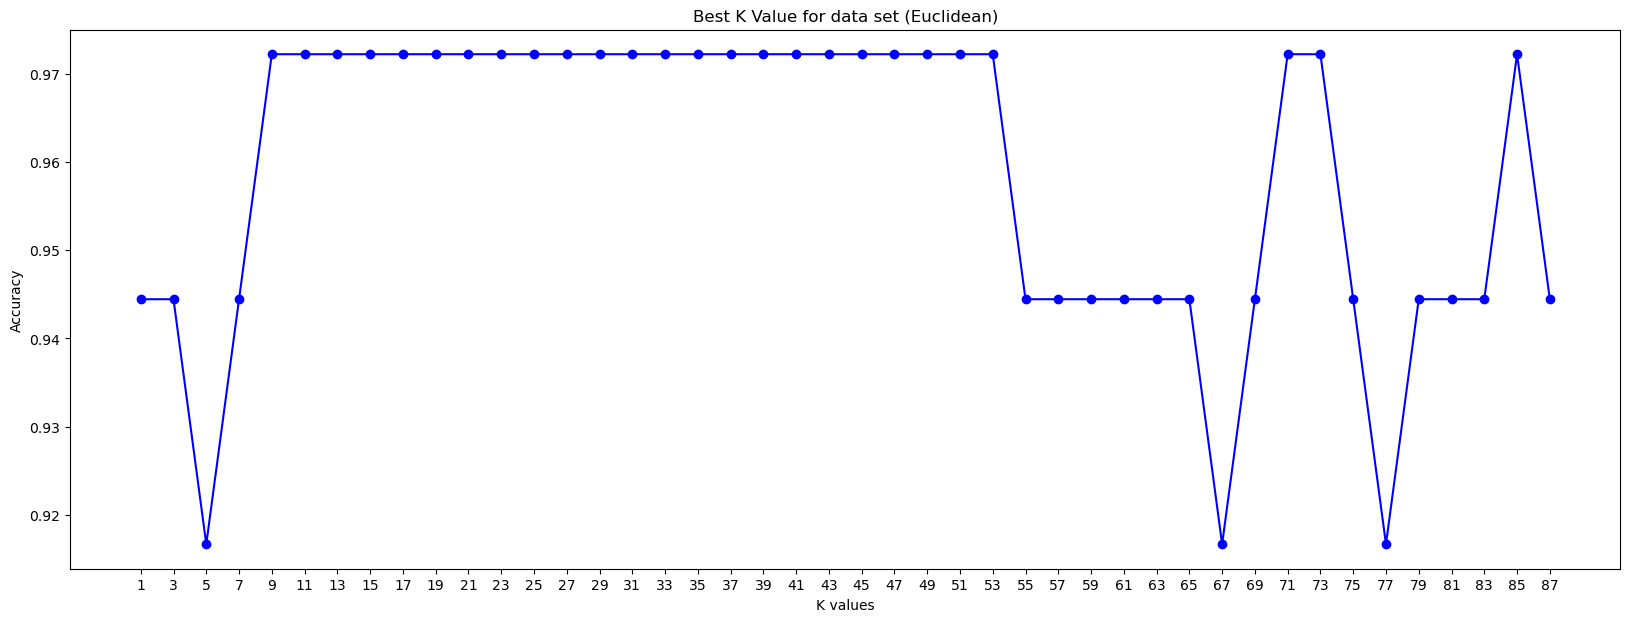

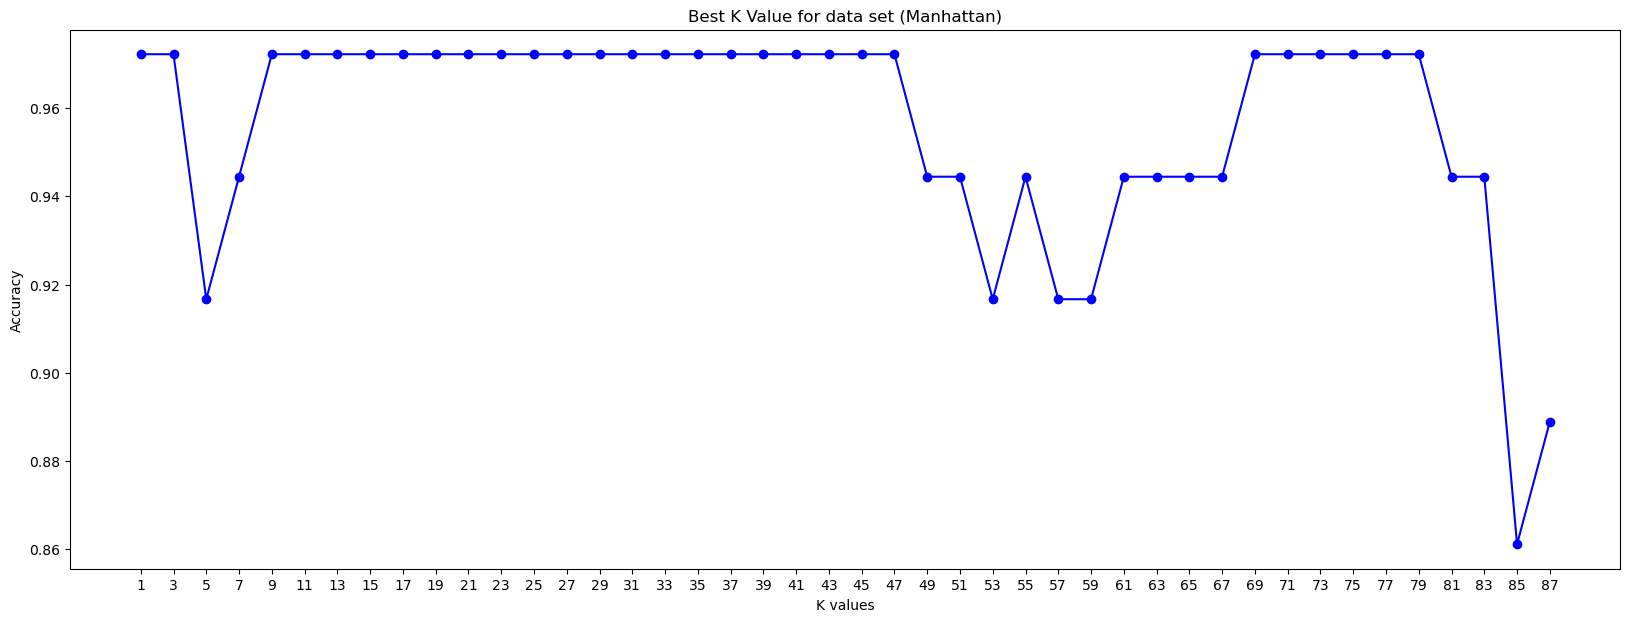

In [11]:
knn_values_ep = []
knn_accuracies_ep = []

for i_ep in range(1, 88, 2):
    predictions_ep = kNN(x_test,x_train,y_train,"Euclidean",i_ep)
    accuracy_ep = accuracy_score(predictions_ep,y_test)
    knn_values_ep.append(i_ep)
    knn_accuracies_ep.append(accuracy_ep)

plt.figure(figsize=(20, 7))
plt.plot(knn_values_ep, knn_accuracies_ep, marker='o', linestyle='-', color='b') 
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Best K Value for data set (Euclidean)") 
plt.xticks(knn_values_ep)
plt.show() 

knn_values_mp = []
knn_accuracies_mp = []

for i_mp in range(1, 88, 2):
    predictions_mp = kNN(x_test,x_train,y_train,"Manhattan",i_mp)
    accuracy_mp = accuracy_score(predictions_mp,y_test)
    knn_values_mp.append(i_mp)
    knn_accuracies_mp.append(accuracy_mp)

plt.figure(figsize=(20, 7))
plt.plot(knn_values_mp, knn_accuracies_mp, marker='o', linestyle='-', color='b') 
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Best K Value for data set (Manhattan)") 
plt.xticks(knn_values_mp)
plt.show() 

Plotting the accuracy vs. K values graph to see which value of K yields the most accurate results. For both Euclidean and Manhattan metrics, it is the most stably accurate after the point K=9. Therefore choosing K=11 is a safe decision.

In [12]:
predictions_e = kNN(x_test,x_train,y_train,"Euclidean",11)
print("          Euclidean Results\n\n    Accuracy: ",accuracy_score(predictions_e,y_test))
print("\n    Classification report:\n\n",classification_report(predictions_e,y_test))
print("\n    Confusion matrix:\n",confusion_matrix(predictions_e,y_test))

          Euclidean Results

    Accuracy:  0.9722222222222222

    Classification report:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.93      1.00      0.96        13
           3       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36


    Confusion matrix:
 [[15  0  0]
 [ 0 13  0]
 [ 0  1  7]]


Clasification report and confusion matrix for Euclidean distance metric.

In [13]:
predictions_m = kNN(x_test,x_train,y_train,"Manhattan",11)
print("          Manhattan Results\n\n    Accuracy: ",accuracy_score(predictions_m,y_test))
print("\n    Classification Report:\n\n",classification_report(predictions_m,y_test))
print("\n    Confusion Matrix:\n",confusion_matrix(predictions_m,y_test))

          Manhattan Results

    Accuracy:  0.9722222222222222

    Classification Report:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.93      1.00      0.96        13
           3       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36


    Confusion Matrix:
 [[15  0  0]
 [ 0 13  0]
 [ 0  1  7]]


Clasification report and confusion matrix for Manhattan distance metric.